# 🛒 Supermarket Sales – Time Series Forecasting  
**Goal:** Predict next 6 months of revenue using historical sales data.  
**Dataset:** 3 months of transaction-level data (Jan–Mar 2019).  
**Methods:** Aggregation → Monthly Sales → Time Series Model (Prophet).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales[1].csv to supermarket_sales[1].csv


In [22]:
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("supermarket_sales[1].csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Total'].sum().reset_index()
monthly_sales.head()

,Date,Total
0,2019-01-31,116291.868
1,2019-02-28,97219.374
2,2019-03-31,109455.507


We aggregate daily transactions into total monthly revenue for forecasting.

In [16]:
df_prophet = monthly_sales.rename(columns={'Date': 'ds', 'Total': 'y'})

## 6-Month Forecast Using Prophet

In [17]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.


In [19]:
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

In [20]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4,2019-05-31,97956.689041,88234.905270,107250.309371
5,2019-06-30,94760.728120,85864.550015,104825.403990
6,2019-07-31,91458.235167,81818.171790,101003.959622
7,2019-08-31,88155.742215,79135.684518,97827.740660
8,2019-09-30,84959.781293,75443.360634,94630.858688


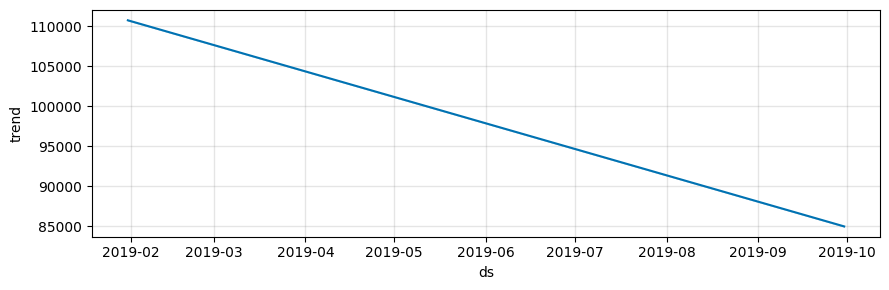

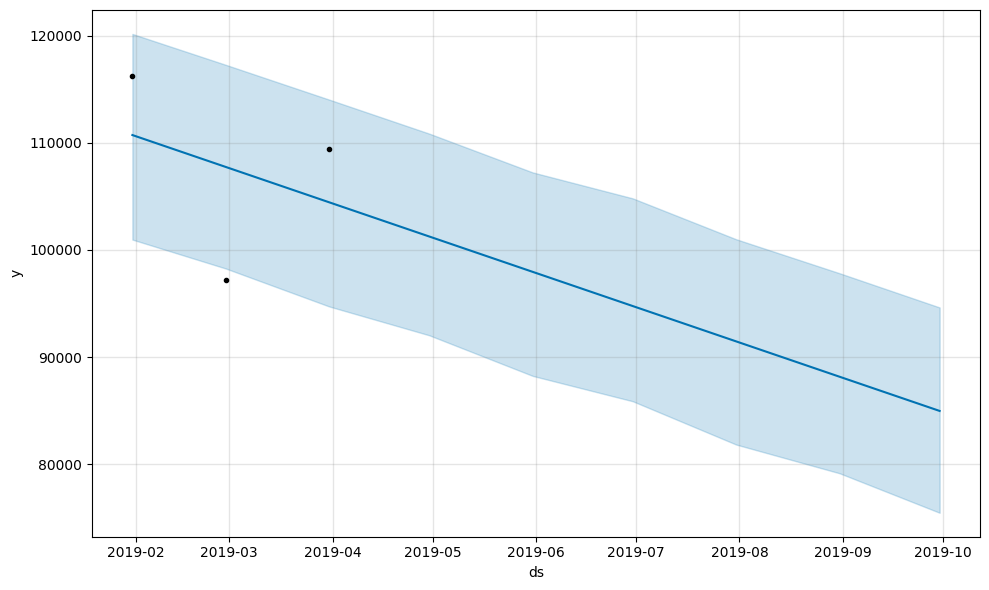

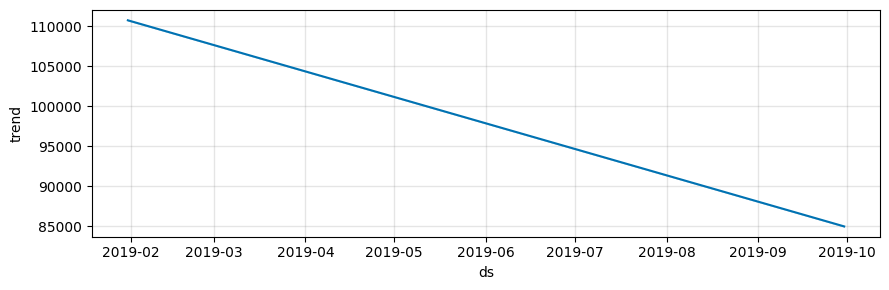

In [23]:
model.plot(forecast)
model.plot_components(forecast)

## 📌 Interpretation
- Sales show a slight downward trend after March.
- Forecast predicts moderate decline in the next 6 months.
- No strong seasonal patterns, likely because data covers only 3 months.

# ✅ Conclusion
- Built a clean forecasting pipeline.
- Predicted next 6 months of supermarket revenue.
- With more data (12+ months), trends & seasonality would be clearer.

# 🔮 Next improvements
- Try ARIMA / LSTM models.
- Include external variables (festival days, branch, promotions).